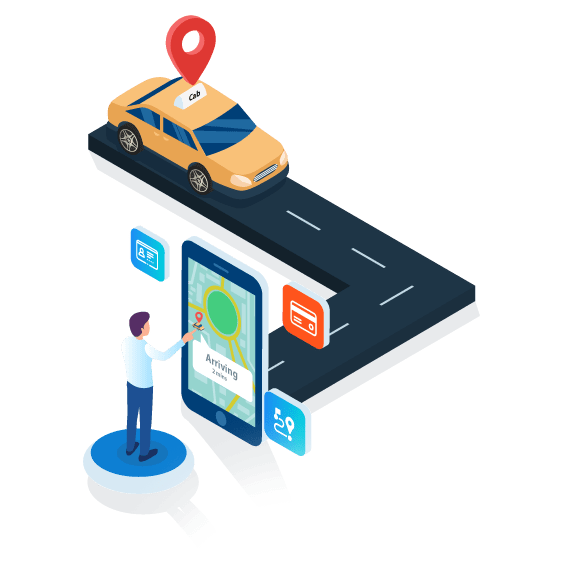

In [ ]:
#-> Importing_google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 -> Importing required Libraries:::



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/my kaggle/cab_booking'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#You can write up to 20GB to the current directory (/content/drive/MyDrive/my kaggle/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd      #-> Data manipulation
import numpy as np       #-> Mathematical operations  
from scipy import stats
from datetime import datetime
import calendar

#Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

#preprocessing step
from sklearn.preprocessing import LabelEncoder

#splitting data
from sklearn.model_selection import train_test_split

#Machine Learning model Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor

#performance metrics for classification model

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import warnings
warnings.simplefilter("ignore")

In [ ]:
import pandas as pd
test = pd.read_csv("/content/drive/MyDrive/my kaggle/cab_booking(mpp-1)/test.csv")
test_label = pd.read_csv("/content/drive/MyDrive/my kaggle/cab_booking(mpp-1)/test_label.csv",header=None)
train = pd.read_csv("/content/drive/MyDrive/my kaggle/cab_booking(mpp-1)/train.csv")
train_label = pd.read_csv("/content/drive/MyDrive/my kaggle/cab_booking(mpp-1)/train_label.csv",header=None)

In [ ]:
train['Total_booking']=train_label[0]

In [ ]:
#-> Display top of dataFrame
train.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,source
0,0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,NaN,test
1,1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,0.0,test
2,2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,1.0,test
3,3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,2.0,test
4,4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,3.0,test


In [ ]:
#-> Display the numbers of rows & columnns in the dataframe
nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2178 rows and 12 columns


In [ ]:
#-> Statistics for each column
train.describe

<bound method NDFrame.describe of       Unnamed: 0          datetime  season  holiday  workingday  \
0              0   5/10/2012 11:00  Summer        0           1   
1              1     6/9/2012 7:00  Summer        0           0   
2              2    3/6/2011 20:00  Spring        0           0   
3              3  10/13/2011 11:00  Winter        0           1   
4              4    6/2/2012 12:00  Summer        0           0   
...          ...               ...     ...      ...         ...   
2173        2173     3/8/2012 3:00  Spring        0           1   
2174        2174   1/12/2012 12:00  Spring        0           1   
2175        2175    3/7/2012 22:00  Spring        0           1   
2176        2176    5/12/2011 5:00  Summer        0           1   
2177        2177   7/18/2012 16:00    Fall        0           1   

                      weather   temp   atemp  humidity  windspeed  \
0          Clear + Few clouds  21.32  25.000        48    35.0008   
1          Clear + Few 

In [ ]:
#-> Display the number of Unique_Values in the Data-set 
train.nunique().sort_values(ascending=False)

Unnamed: 0       2178
datetime         2178
Total_booking    2177
humidity           80
atemp              54
temp               44
windspeed          24
season              4
weather             3
holiday             2
workingday          2
source              1
dtype: int64

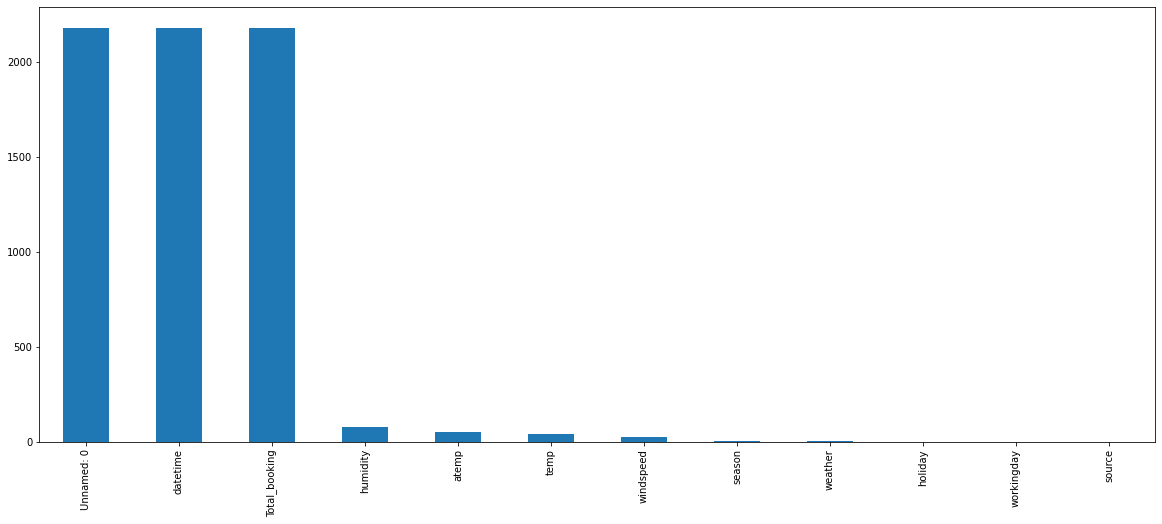

In [ ]:
#-> Visually display the number of Unique_Values in the Data-set 
train.nunique().sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#-> Getting the data Type of every colomn in the Data-set
train.dtypes

Unnamed: 0         int64
datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking    float64
source            object
dtype: object

In [ ]:
# Creating new columns from the DateTime columns
train['Date']= train.datetime.apply(lambda x : x.split()[0])
train['Hour']= train.datetime.apply(lambda x : x.split()[1].split(':')[0])
train['Weekday']= train.Date.apply(lambda dataString : calendar.day_name[datetime.strptime(dataString,"%m/%d/%Y").weekday()])
train['month']= train.Date.apply(lambda dataString : calendar.month_name[datetime.strptime(dataString,"%m/%d/%Y").month])

test['Date']= test.datetime.apply(lambda x : x.split()[0])
test['Hour']= test.datetime.apply(lambda x : x.split()[1].split(':')[0])
test['Weekday']= test.Date.apply(lambda dataString : calendar.day_name[datetime.strptime(dataString,"%m/%d/%Y").weekday()])
test['month']= test.Date.apply(lambda dataString : calendar.month_name[datetime.strptime(dataString,"%m/%d/%Y").month])

In [ ]:
#-> Display top of dataFrame
train.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,source,Date,Hour,Weekday,month
0,0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,NaN,test,5/10/2012,11,Thursday,May
1,1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,0.0,test,6/9/2012,7,Saturday,June
2,2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,1.0,test,3/6/2011,20,Sunday,March
3,3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,2.0,test,10/13/2011,11,Thursday,October
4,4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,3.0,test,6/2/2012,12,Saturday,June


***-> Feature Engineering and Visualization***

In [ ]:
#-> Data Types and Missing Values

# See the column data types and non-missing values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2178 non-null   int64  
 1   datetime       2178 non-null   object 
 2   season         2178 non-null   object 
 3   holiday        2178 non-null   int64  
 4   workingday     2178 non-null   int64  
 5   weather        2178 non-null   object 
 6   temp           2178 non-null   float64
 7   atemp          2178 non-null   float64
 8   humidity       2178 non-null   int64  
 9   windspeed      2178 non-null   float64
 10  Total_booking  2177 non-null   float64
 11  source         2178 non-null   object 
 12  Date           2178 non-null   object 
 13  Hour           2178 non-null   object 
 14  Weekday        2178 non-null   object 
 15  month          2178 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 272.4+ KB
None


In [ ]:
#-> Sumarizethe  Null_Values
train.isnull().sum()

Unnamed: 0       0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    1
source           0
Date             0
Hour             0
Weekday          0
month            0
dtype: int64

In [ ]:
# Removing Null value 
train=train.dropna()

In [ ]:
sum(train['Total_booking'].isnull())

0

In [ ]:
# Removing Null value 
train=train.dropna()

In [ ]:
#-> Display the number of unique values in Hour_Column
train.Hour.unique()

array(['7', '20', '11', '12', '23', '18', '16', '3', '1', '4', '2', '15',
       '22', '5', '17', '6', '8', '13', '0', '14', '9', '19', '21', '10'],
      dtype=object)

In [ ]:
#-> Display the Numerical_Values in columns
columns = train.columns

num_col= [col for col in train.columns if train[col].dtypes!='O']
num_col

['Unnamed: 0',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'Total_booking']

In [ ]:
#-> Display the Categorical_Features in columns
columns = train.columns

cat_col= [col for col in train.columns if train[col].dtypes=='O']
cat_col

['datetime', 'season', 'weather', 'source', 'Date', 'Hour', 'Weekday', 'month']

In [ ]:
#-> Display the Categorical_Features Unique_Values in columns
for col in cat_col:
    print(col)
    print(train[col].unique())
    print("-----------")

datetime
['6/9/2012 7:00' '3/6/2011 20:00' '10/13/2011 11:00' ... '3/7/2012 22:00'
 '5/12/2011 5:00' '7/18/2012 16:00']
-----------
season
['Summer' 'Spring' 'Winter' 'Fall']
-----------
weather
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy ']
-----------
source
['test']
-----------
Date
['6/9/2012' '3/6/2011' '10/13/2011' '6/2/2012' '4/1/2011' '5/15/2011'
 '11/1/2012' '10/12/2012' '3/18/2011' '7/6/2011' '7/2/2012' '6/1/2012'
 '5/4/2012' '6/17/2012' '4/10/2011' '10/4/2011' '5/10/2011' '8/8/2011'
 '10/17/2011' '10/7/2012' '12/1/2011' '8/14/2011' '3/1/2011' '3/19/2011'
 '3/9/2011' '3/3/2011' '4/7/2012' '3/14/2012' '12/10/2012' '3/12/2012'
 '9/5/2011' '12/6/2012' '8/12/2012' '11/7/2011' '10/6/2012' '1/15/2012'
 '9/3/2011' '8/4/2012' '11/13/2011' '9/4/2011' '1/19/2012' '5/3/2012'
 '7/18/2012' '10/9/2011' '8/11/2012' '11/15/2011' '8/13/2012' '5/16/2012'
 '8/4/2011' '9/7/2012' '12/6/2011' '2/19/2011' '2/14/2011' '3/9/2012'
 '11/11/2011' '7/16/2011' '4/11/2012' '10/1/2012' 

In [ ]:
#-> Using Label Encoder to converting Categorical_Features to Numerical_Values
le = LabelEncoder()
for i in train.columns:
    if train[i].dtype=='object':
        train[i]=le.fit_transform(train[i])
train.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,source,Date,Hour,Weekday,month
1,1,1632,2,0,0,0,23.78,27.275,64,7.0015,0.0,0,341,21,2,6
2,2,1055,1,0,0,1,11.48,12.120,100,27.9993,1.0,0,220,13,3,7
3,3,242,3,0,1,2,25.42,28.790,83,0.0000,2.0,0,46,3,4,10
4,4,1560,2,0,0,0,25.42,31.060,43,23.9994,3.0,0,327,4,2,6
5,5,1103,2,0,1,0,12.30,15.910,61,6.0032,4.0,0,228,16,0,0


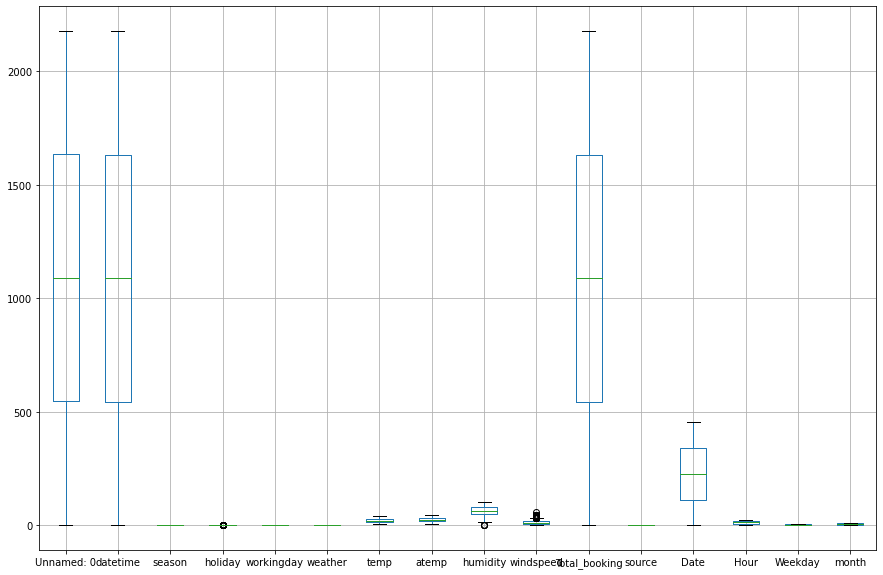

In [ ]:
#Check outlier using box plot
plt.figure(figsize=(15,10))
train.boxplot()
plt.show()

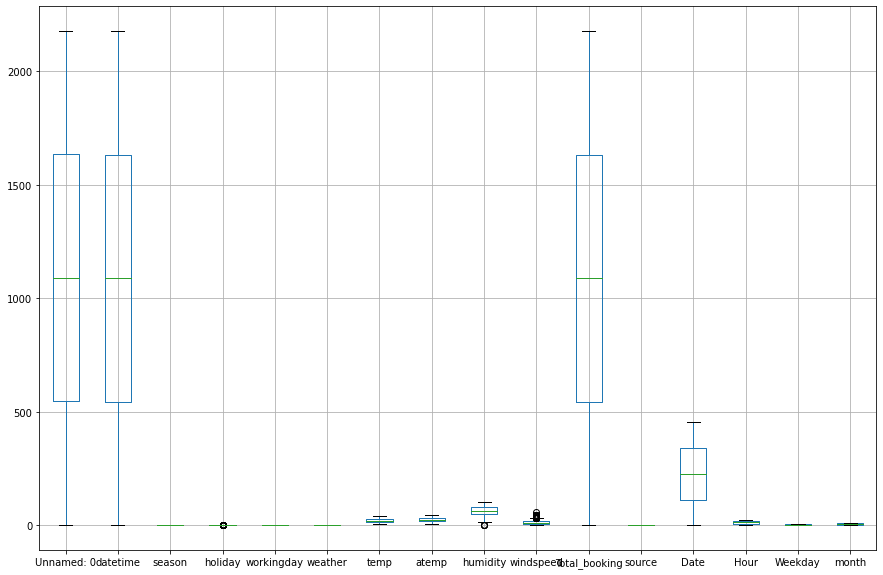

In [ ]:
#-> Display the Outlier using box plot
plt.figure(figsize=(15,10))
train.boxplot()
plt.show()

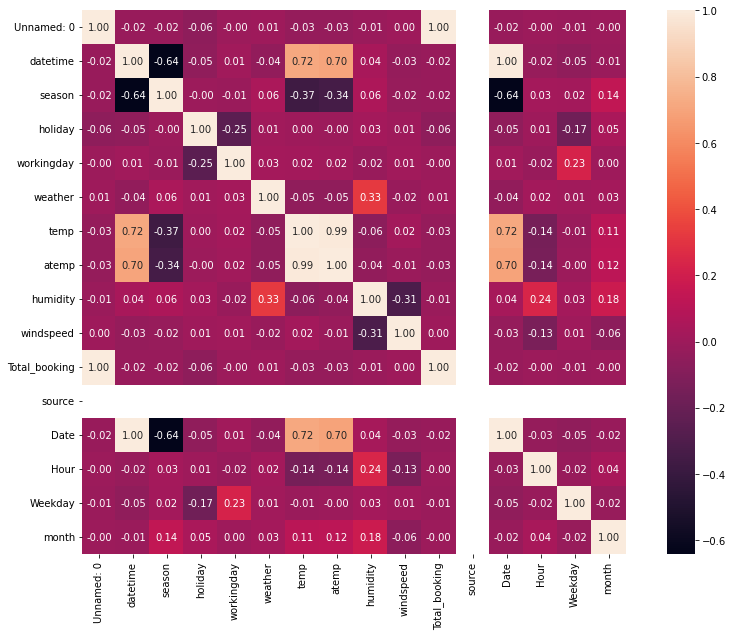

In [ ]:
#-> Correlation between diffrent features
corrmat = train.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10})
plt.show()

In [ ]:
from scipy.stats import pearsonr
var = ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Date','Hour','Weekday','month']
for col in var:
    coef, pval = pearsonr(train[col], train.Total_booking)
    print('Correlation b/w Total booking and %s - coef: %.2f, pval: %f' %(col, coef, pval))

Correlation b/w Total booking and datetime - coef: -0.02, pval: 0.414126
Correlation b/w Total booking and season - coef: -0.02, pval: 0.377514
Correlation b/w Total booking and holiday - coef: -0.06, pval: 0.007909
Correlation b/w Total booking and workingday - coef: -0.00, pval: 0.821893
Correlation b/w Total booking and weather - coef: 0.01, pval: 0.784866
Correlation b/w Total booking and temp - coef: -0.03, pval: 0.206837
Correlation b/w Total booking and atemp - coef: -0.03, pval: 0.184480
Correlation b/w Total booking and humidity - coef: -0.01, pval: 0.744916
Correlation b/w Total booking and windspeed - coef: 0.00, pval: 0.942449
Correlation b/w Total booking and Date - coef: -0.02, pval: 0.422617
Correlation b/w Total booking and Hour - coef: -0.00, pval: 0.875271
Correlation b/w Total booking and Weekday - coef: -0.01, pval: 0.694110
Correlation b/w Total booking and month - coef: -0.00, pval: 0.929838


-> Performing Data_Visualization

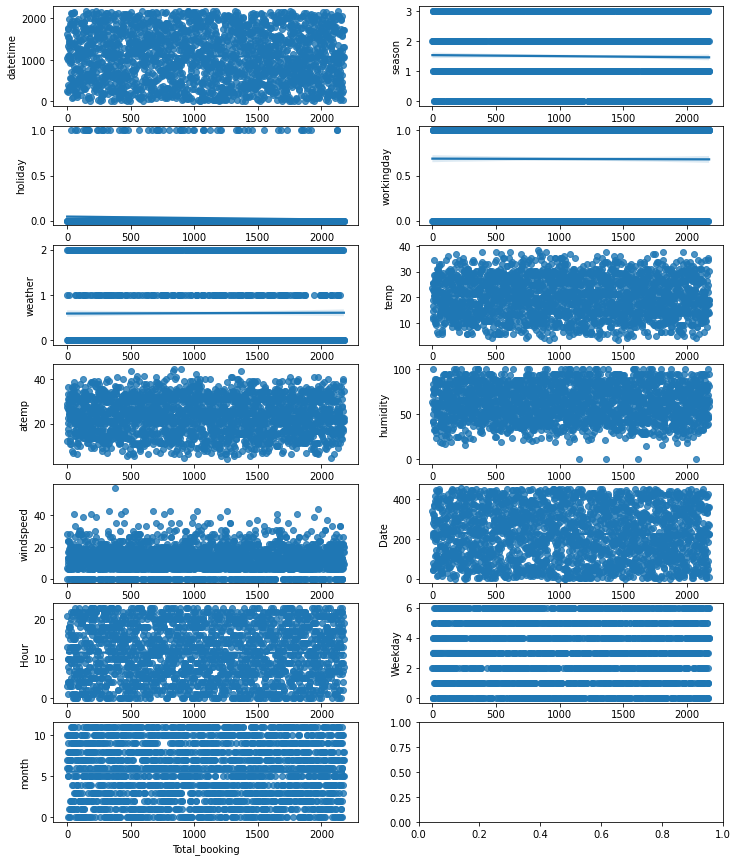

In [ ]:
# Visualizing Total_booking Vs other features to generate insights
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(12,15))
i = 0
j = 0
for var in ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Date','Hour','Weekday','month']:
    sns.regplot(x='Total_booking', y=var, data =train, ax= axs[i][j])
    j +=1
    if j>1:
        i += 1
        j =0

count   2177.00
mean    1088.00
std      628.59
min        0.00
25%      544.00
50%     1088.00
75%     1632.00
max     2176.00
Name: Total_booking, dtype: float64


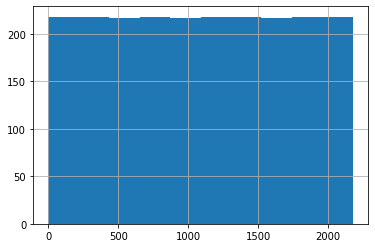

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print(train.Total_booking.describe())
train.Total_booking.hist()
plt.show()

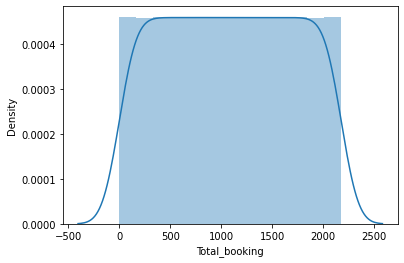

In [ ]:
# Total booking data is skewed
sns.distplot(train.Total_booking);

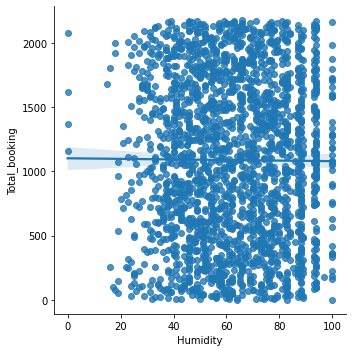

In [ ]:
sns.lmplot(x="humidity", y="Total_booking",data=train,fit_reg=True,)
plt.xlabel("Humidity")
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fed8cdee890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed8cdee890>)

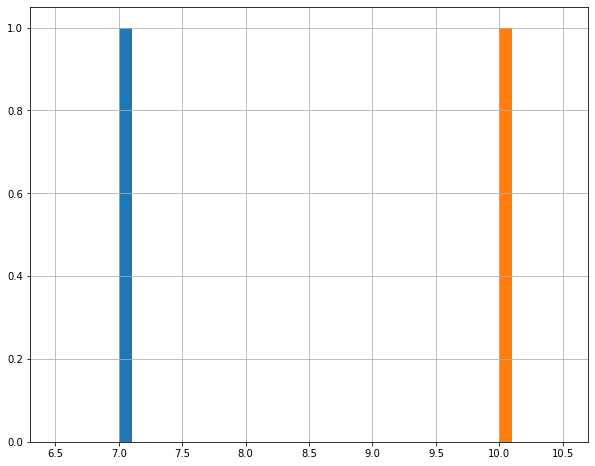

In [ ]:
#Relation between Total booking(1st Plot) and Month(2nd Plot)
plt.figure(figsize=(10,8))
train[train['Total_booking']==1]['month'].hist(), train[train['Total_booking']==2]['month'].hist()

-> Whole_Data-Set_Exploration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 6.6 MB/s 
     |████████████████████████████████| 943 kB 56.1 MB/s 
     |████████████████████████████████| 133 kB 55.8 MB/s 
     |████████████████████████████████| 50 kB 8.5 MB/s 
     |████████████████████████████████| 1.0 MB 55.0 MB/s 
     |████████████████████████████████| 965 kB 68.7 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 435 kB 69.8 MB/s 
     |████████████████████████████████| 749 kB 71.6 MB/s 
     |████████████████████████████████| 95 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 29.9 MB/s 
     |████████████████████████████████| 271 kB 73.8 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████


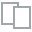
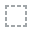
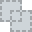
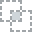
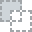
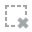
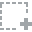
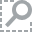
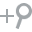
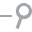
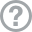
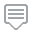
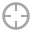
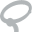
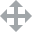
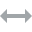
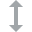
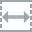
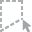
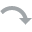
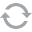
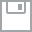
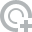
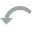
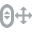
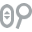
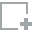
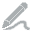
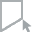
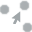
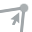
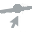

In [ ]:
!pip install dataprep
from dataprep.eda import plot
plot(train)

In [ ]:
# Implementing Hot Encoding for Categorical Features
from sklearn.preprocessing import OneHotEncoder

cat_columns = [feature for feature in train if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(train[cat_columns]) 

train

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,source,Date,Hour,Weekday,month
1,1,1632,2,0,0,0,23.78,27.27,64,7.00,0.00,0,341,21,2,6
2,2,1055,1,0,0,1,11.48,12.12,100,28.00,1.00,0,220,13,3,7
3,3,242,3,0,1,2,25.42,28.79,83,0.00,2.00,0,46,3,4,10
4,4,1560,2,0,0,0,25.42,31.06,43,24.00,3.00,0,327,4,2,6
5,5,1103,2,0,1,0,12.30,15.91,61,6.00,4.00,0,228,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2173,1084,1,0,1,0,18.86,22.73,63,26.00,2172.00,0,225,17,4,7
2174,2174,44,1,0,1,2,13.94,17.43,81,7.00,2173.00,0,7,4,4,4
2175,2175,1073,1,0,1,0,18.86,22.73,59,20.00,2174.00,0,223,15,6,7
2176,2176,1299,2,0,1,0,17.22,21.21,94,9.00,2175.00,0,272,19,4,8


In [ ]:
X = train.drop(["Total_booking"], axis=1)
y = train["Total_booking"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20, random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1741, 15)
(436, 15)
(1741,)
(436,)


In [ ]:
lr = LinearRegression()      #-> Creating_Instant
lr.fit(X_train , y_train)    #-> Fit Instant on train-set
print("The final coefficients after training is :", lr.coef_)
print("The final intercept after training is :", lr.intercept_)

The final coefficients after training is : [ 1.00000000e+00 -6.97590543e-17 -2.75581742e-15 -7.33948487e-15
  1.00972691e-14  1.62747863e-15 -6.68994869e-15  5.64607069e-15
  7.33335529e-17  8.25836733e-16 -1.10670178e-21  1.01059061e-15
  7.62932781e-16 -4.35013356e-15  4.47386080e-16]
The final intercept after training is : -0.9999999999990905


In [ ]:
predicted = lr.predict(X) 
print("Predicted values: ", predicted[:4])
print("Actual values:\n", train[['windspeed','Total_booking']][:4])

Predicted values:  [1.14908083e-12 1.00000000e+00 2.00000000e+00 3.00000000e+00]
Actual values:
    windspeed  Total_booking
1       7.00           0.00
2      28.00           1.00
3       0.00           2.00
4      24.00           3.00


In [ ]:
y_pred = lr.predict(X_test)
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_absolute_error(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 1.0
mean absolute error of our model is: 6.181273637690088e-13
root mean squared error of our model is: 7.16554313456979e-13


In [ ]:
#Cross Validation
# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(lr, X, y, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


In [ ]:
k_fold  = KFold(n_splits=5)
scores = cross_val_score(lr, X, y, cv=k_fold, scoring='neg_mean_squared_error')

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [-8.72795431e-26 -4.03629989e-25 -8.11136161e-27 -1.84927160e-25
 -3.69616624e-25]
Accuracy: -0.00 (+/- 0.00)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree_max = 6

scores = []
cv_scores = []
for i in range(1, degree_max+1):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    slm_poly = LinearRegression()
    slm_poly.fit(X_poly, y)
    predict_poly = slm_poly.predict(X_poly)
    score = mean_squared_error(y, predict_poly)
    scores.append(score)
    
    #Generate mean of cross validation scores
    cv_scores.append(cross_val_score(slm_poly, X_poly, y, cv=5, scoring='neg_mean_squared_error'))

print(scores)

[2.3400136928531344e-25, 7.119509871803431e-19, 1.4577573270754165e-11, 0.000430658659670815, 0.0009564909508110657, 0.003018482103956693]


In [ ]:
scoring = ['neg_mean_squared_error', 'r2']
scores = cross_validate(lr, X, y, scoring=scoring,cv=5, return_train_score=False)
print(sorted(scores.keys()))

print('Mean squared error:',scores['test_neg_mean_squared_error'].mean())
print('r2:',scores['test_r2'].mean())

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2']
Mean squared error: -2.1071293564017373e-25
r2: 1.0


In [ ]:
#Computing bootstrap sample 
data = train.Total_booking
sample_1 = np.random.choice(data, len(data))

print("Mean: %.4f, Median: %.4f, and Standard Deviation: %.4f of MEDV" 
      %(np.mean(data), np.median(data), np.std(data)))
print("Mean: %.4f, Median: %.4f, and Standard Deviation: %.4f of sample" 
      %(np.mean(sample_1), np.median(sample_1), np.std(sample_1)))

Mean: 1088.0000, Median: 1088.0000, and Standard Deviation: 628.4457 of MEDV
Mean: 1084.7285, Median: 1099.0000, and Standard Deviation: 636.1941 of sample


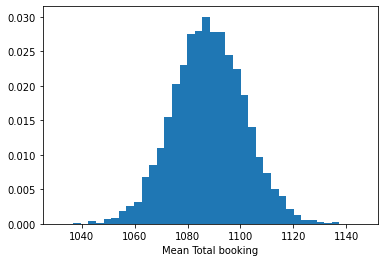

In [ ]:
#Generating Replications of bootstrap data and plotting histogram

def generate_bootstrap(data, func):
    # generate bootstrap replicate
    sample_ = np.random.choice(data, len(data))
    return func(sample_)

replicates = []
for i in range(10000):
    replicate_ = generate_bootstrap(train.Total_booking, np.mean)
    replicates.append(replicate_)
    
plt.hist(replicates, bins=40, density=True)
plt.xlabel('Mean Total booking')
plt.show()

Confidence interval of bootstrap replicate: [1061.57555122 1114.70018374]


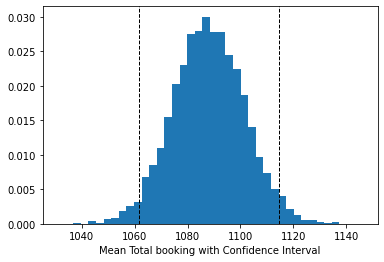

In [ ]:
#Confidence Interval of Bootstrap replication

conf_int = np.percentile(replicates, [2.5, 97.5])
print("Confidence interval of bootstrap replicate:", conf_int)

# plotting bootstrap replicates with confidence interval
plt.hist(replicates, bins=40, density=True)
plt.xlabel('Mean Total booking with Confidence Interval')
plt.axvline(conf_int[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(conf_int[1], color='k', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
#Ridge Regression

from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)

# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(clf, X, y, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


In [ ]:
#The Lasso
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(clf, X, y, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


In [ ]:
print('Mean Squared Error: %0.4f'%mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error %.4f'%np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score: %0.4f'%r2_score(y_test,y_pred))
cv_lin_model=cross_val_score(LinearRegression(),X,y,cv=10)
#Accuracy
print('Accuracy : %.4f (+/- %.3f)'%(cv_lin_model.mean(),cv_lin_model.std()*2))

Mean Squared Error: 0.0000
Root Mean Squared Error 0.0000
R2 Score: 1.0000
Accuracy : 1.0000 (+/- 0.000)


In [ ]:
from sklearn.feature_selection import RFE

model=LinearRegression()

rfe=RFE(model)
feature_selector=rfe.fit(X_train,y_train)

print('Selected Features:',X_train.columns[feature_selector.support_])
print('Feature Ranking: ',feature_selector.ranking_)

Selected Features: Index(['Unnamed: 0', 'season', 'holiday', 'workingday', 'temp', 'atemp',
       'Weekday'],
      dtype='object')
Feature Ranking:  [1 8 1 1 1 2 1 1 6 4 9 7 3 1 5]


In [ ]:
#reducing X to selected Features
new_X_train=feature_selector.transform(X_train)
new_X_test=feature_selector.transform(X_test)
ridge_model=Ridge()
ridge_model.fit(new_X_train,y_train)
new_ridge_pred=ridge_model.predict(new_X_test)

In [ ]:
print('Mean Squared Error: %0.4f'%mean_squared_error(y_test,new_ridge_pred))
print('Root Mean Squared Error %.4f'%np.sqrt(mean_squared_error(y_test,new_ridge_pred)))
print('R2 Score: %0.4f'%r2_score(y_test,new_ridge_pred))
cv_lin_model=cross_val_score(Ridge(),X,y,cv=10)
#Accuracy
print('Accuracy : %.4f (+/- %.3f)'%(cv_lin_model.mean(),cv_lin_model.std()*2))

Mean Squared Error: 0.0000
Root Mean Squared Error 0.0000
R2 Score: 1.0000
Accuracy : 1.0000 (+/- 0.000)


In [ ]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 20.8386


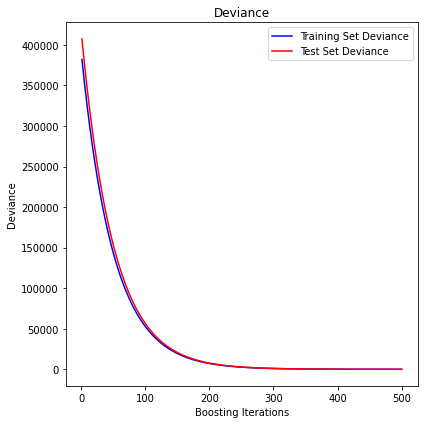

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

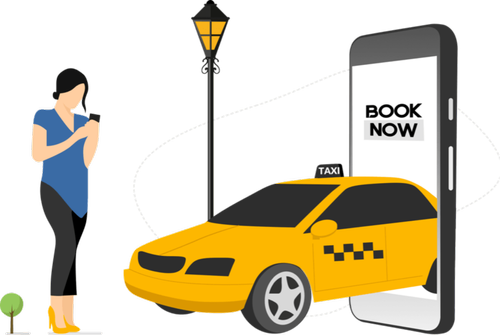

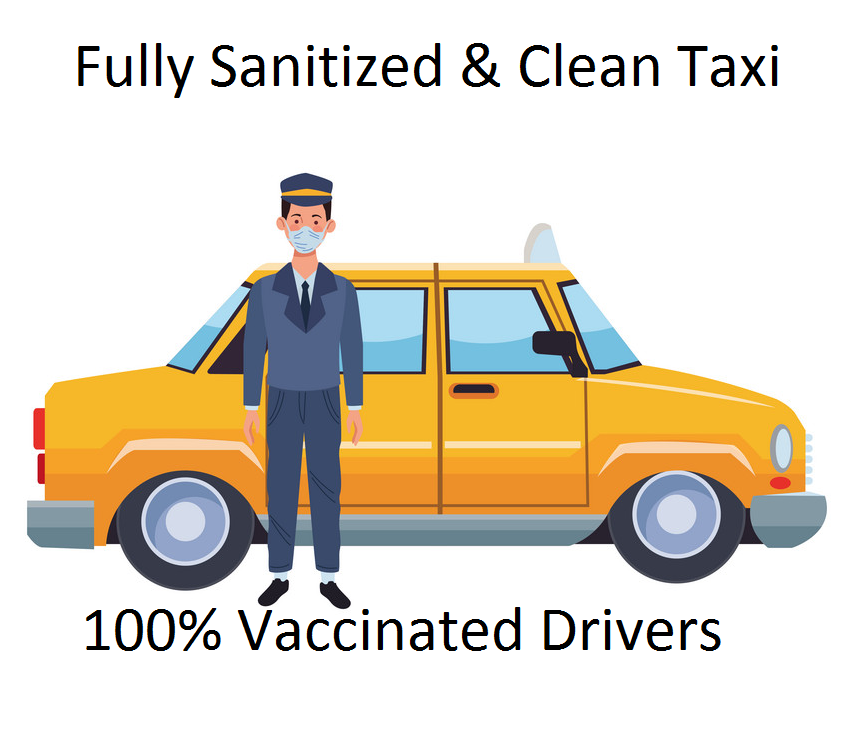